## Visual Comparison Between Different Classification Methods in Shogun

Notebook by Youssef Emad El-Din (Github ID: <a href="https://github.com/youssef-emad/">youssef-emad</a>)

This Notebook demonstrates different classification methods in shogun.

1. <a href ="#section1">Data Generation and Visualization</a>
2. <a href ="#section2">Support Vector Machine</a>
 1. <a href ="#section2a">Linear SVM</a>
 2. <a href ="#section2b">Gaussian Kernel</a>
 3. <a href ="#section2c">Sigmoid Kernel</a>
 4. <a href ="#section2d">Polynomial Kernel</a>
3. <a href ="#section3">Naive Bayes</a>
4. <a href ="#section4">Nearest Neighbors</a>
5. <a href ="#section5">Linear Discriminant Analysis</a>
6. <a href ="#section6">Quadratic Discriminat Analysis</a>
7. <a href ="#section7">Gaussian Process</a>
 1. <a href ="#section7a">Logit Likelihood model</a>
 2. <a href ="#section7b">Probit Likelihood model</a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from modshogun import *

## <a id = "section1">Data Generation and Visualization</a>

In [41]:
positive_class = np.random.randn(2,100) + 2
negative_class = np.random.randn(2,100) - 2

labels_linear = np.concatenate(np.array((np.ones(100, dtype=np.double), -np.ones(100, dtype=np.double))))
feats_linear = np.hstack((positive_class,negative_class))

Second Dataset is generated using generate_classification_toy_data method defined in the <a href="http://www.shogun-toolbox.org/static/notebook/current/gaussian_processes.html">Gaussian Processes notebook</a>.

In [17]:
def generate_classification_toy_data(n_train=400, mean_a=np.asarray([0, 0]), std_dev_a=1.0, mean_b=3, std_dev_b=0.5):

    # positive examples are distributed normally
    X1 = (np.random.randn(n_train, 2)*std_dev_a+mean_a).T

    # negative examples have a "ring"-like form
    r = np.random.randn(n_train)*std_dev_b+mean_b
    angle = np.random.randn(n_train)*2*np.pi
    X2 = np.array([r*np.cos(angle)+mean_a[0], r*np.sin(angle)+mean_a[1]])

    # stack positive and negative examples in a single array
    X_train = np.hstack((X1,X2))

    # label positive examples with +1, negative with -1
    y_train = np.zeros(n_train*2)
    y_train[:n_train] = 1
    y_train[n_train:] = -1

    return X_train, y_train

In [20]:
feats_non_linear, labels_non_linear=generate_classification_toy_data()

Data visualization methods.

In [25]:
def plot_binary_data(X_train, y_train):
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'ro')
    plt.plot(X_train[0, np.argwhere(y_train == -1)], X_train[1, np.argwhere(y_train == -1)], 'bo')

In [55]:
def compute_plot_isolines(classifier,features,size=200,fading=True):
    
    x1 = np.linspace(1.2*min(features[0]), 1.2*max(features[0]), size)
    x2 = np.linspace(1.2*min(features[1]), 1.2*max(features[1]), size)

    x, y = np.meshgrid(x1, x2)

    plot_features=RealFeatures(np.array((np.ravel(x), np.ravel(y))))
    
    if fading == True:
        plot_labels = classifier.apply(plot_features).get_values()
    else:
        plot_labels = classifier.apply(plot_features).get_labels()
    z = plot_labels.reshape((size, size))
    return x,y,z

In [52]:
def plot_model(classifier,features,labels,fading=True):
    x,y,z = compute_plot_isolines(classifier,features,fading=fading)
    plt.pcolor(x,y,z,cmap='RdBu_r')
    plt.contour(x, y, z, linewidths=1, colors='black')
    plot_binary_data(features, labels)
    

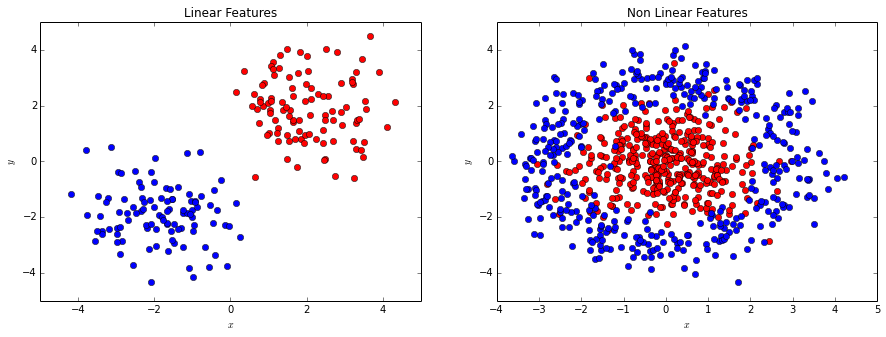

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Linear Features")
plot_binary_data(feats_linear, labels_linear)
plt.subplot(122)
plt.title("Non Linear Features")
plot_binary_data(feats_non_linear, labels_non_linear)

In [43]:
shogun_feats_linear = RealFeatures(feats_linear)
shogun_feats_non_linear = RealFeatures(feats_non_linear)

shogun_labels_linear = BinaryLabels(labels_linear)
shogun_labels_non_linear = BinaryLabels(labels_non_linear)

## <a id="section2">Support Vector Machine</a>

<a id="section2a">Linear SVM</a>

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: [WARN] In file /home/youssef/shogun/src/shogun/classifier/svm/LibLinear.cpp line 416: reaching max number of iterations
Using -s 2 may be faster(also see liblinear FAQ)




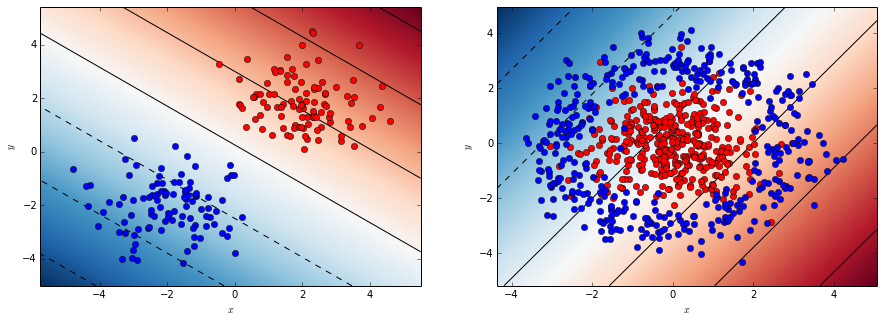

In [67]:
plt.figure(figsize=(15,5))
c  = 0.5
epsilon =1e-3
svm = LibLinear(c,shogun_feats_linear,shogun_labels_linear)
svm.set_liblinear_solver_type(L2R_L2LOSS_SVC) 
svm.set_epsilon(epsilon)

svm.train()
plt.subplot(121)
plot_model(svm,feats_linear,labels_linear)

svm = LibLinear(c,shogun_feats_non_linear,shogun_labels_non_linear)
svm.train()
plt.subplot(122)
plot_model(svm,feats_non_linear,labels_non_linear)

<a id ="section2b">Gaussian Kernel</a>

In [68]:
gaussian_c=0.7

gaussian_kernel_linear=GaussianKernel(shogun_feats_linear, shogun_feats_linear, 100)
gaussian_svm_linear=LibSVM(gaussian_c, gaussian_kernel_linear, shogun_labels_linear)
out = gaussian_svm_linear.train()

gaussian_kernel_non_linear=GaussianKernel(shogun_feats_non_linear, shogun_feats_non_linear, 100)
gaussian_svm_non_linear=LibSVM(gaussian_c, gaussian_kernel_non_linear, shogun_labels_non_linear)
out = gaussian_svm_non_linear.train()

True

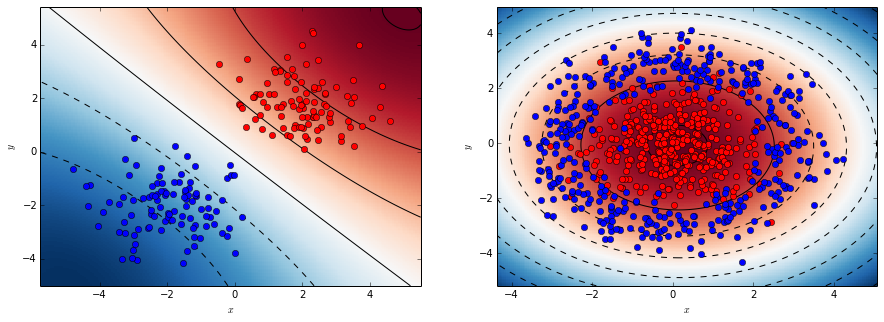

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(gaussian_svm_linear,feats_linear,labels_linear)

plt.subplot(122)
plot_model(gaussian_svm_non_linear,feats_non_linear,labels_non_linear)

<a id ="section2c">Sigmoid Kernel</a>

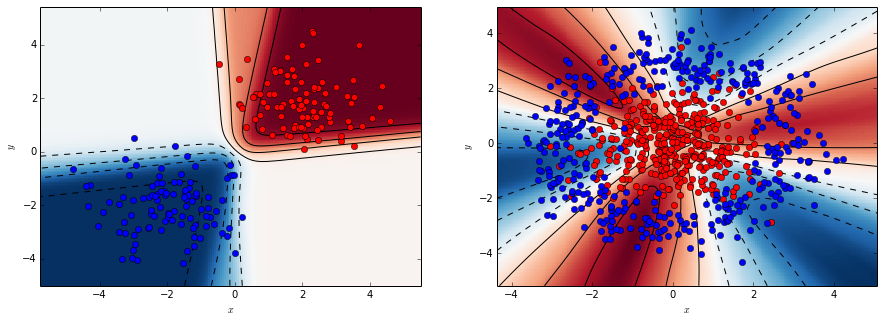

In [89]:
sigmoid_c = 0.9

sigmoid_kernel_linear = SigmoidKernel(shogun_feats_linear,shogun_feats_linear,200,1,0.5)
sigmoid_svm = LibSVM(sigmoid_c, sigmoid_kernel_linear, shogun_labels_linear)
out = sigmoid_svm.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(sigmoid_svm,feats_linear,labels_linear)

sigmoid_kernel_non_linear = SigmoidKernel(shogun_feats_non_linear,shogun_feats_non_linear,400,2.5,2)
sigmoid_svm = LibSVM(sigmoid_c, sigmoid_kernel_non_linear, shogun_labels_non_linear)
out = sigmoid_svm.train()

plt.subplot(122)
plot_model(sigmoid_svm,feats_non_linear,labels_non_linear)

<a id ="section2d">Polynomial Kernel</a>

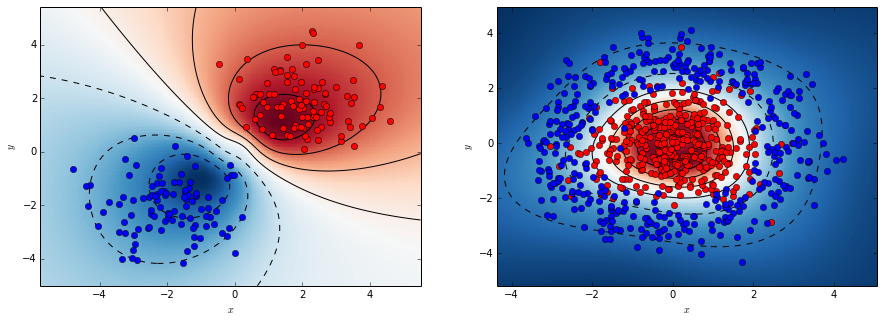

In [87]:
poly_c = 0.5
degree = 4

poly_kernel_linear = PolyKernel(shogun_feats_linear, shogun_feats_linear, degree, True)
poly_svm = LibSVM(poly_c, poly_kernel_linear, shogun_labels_linear)
out = poly_svm.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(poly_svm,feats_linear,labels_linear)

poly_kernel_non_linear=PolyKernel(shogun_feats_non_linear, shogun_feats_non_linear, degree, True)
poly_svm = LibSVM(poly_c, poly_kernel_non_linear, shogun_labels_non_linear)
out = poly_svm.train()

plt.subplot(122)
plot_model(poly_svm,feats_non_linear,labels_non_linear)

## <a id ="section3">Naive Bayes</a>

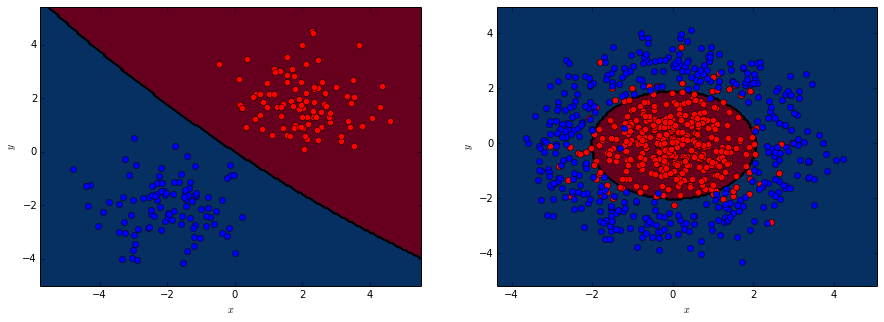

In [81]:
multiclass_labels_linear = shogun_labels_linear.get_labels()
for i in range(0,len(multiclass_labels_linear)):
    if multiclass_labels_linear[i] == -1:
        multiclass_labels_linear[i] = 0

multiclass_labels_non_linear = shogun_labels_non_linear.get_labels()
for i in range(0,len(multiclass_labels_non_linear)):
    if multiclass_labels_non_linear[i] == -1:
        multiclass_labels_non_linear[i] = 0


shogun_multiclass_labels_linear = MulticlassLabels(multiclass_labels_linear)
shogun_multiclass_labels_non_linear = MulticlassLabels(multiclass_labels_non_linear)

naive_bayes = GaussianNaiveBayes()
naive_bayes.set_features(shogun_feats_linear)
naive_bayes.set_labels(shogun_multiclass_labels_linear)
naive_bayes.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(naive_bayes,feats_linear,labels_linear,fading=False)

naive_bayes.set_features(shogun_feats_non_linear)
naive_bayes.set_labels(shogun_multiclass_labels_non_linear)
naive_bayes.train()

plt.subplot(122)
plot_model(naive_bayes,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section4">Nearest Neighbors</a>

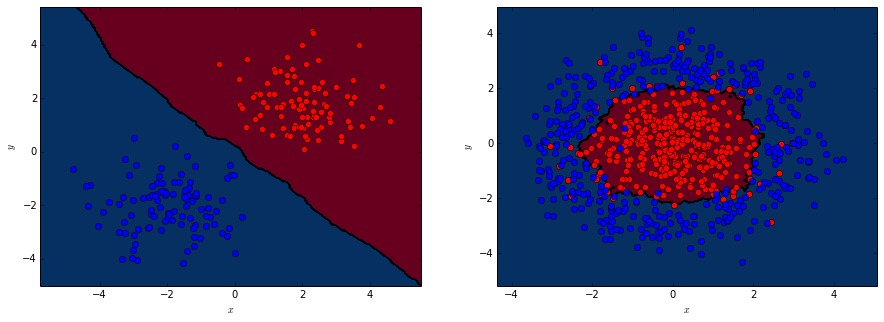

In [92]:
number_of_neighbors = 10

distances_linear = EuclideanDistance(shogun_feats_linear, shogun_feats_linear)
knn = KNN(number_of_neighbors,distances_linear,shogun_labels_linear)
knn.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(knn,feats_linear,labels_linear,fading=False)

distances_non_linear = EuclideanDistance(shogun_feats_non_linear, shogun_feats_non_linear)
knn = KNN(number_of_neighbors,distances_non_linear,shogun_labels_non_linear)
knn.train()

plt.subplot(122)
plot_model(knn,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section5">Linear Discriminant Analysis</a>

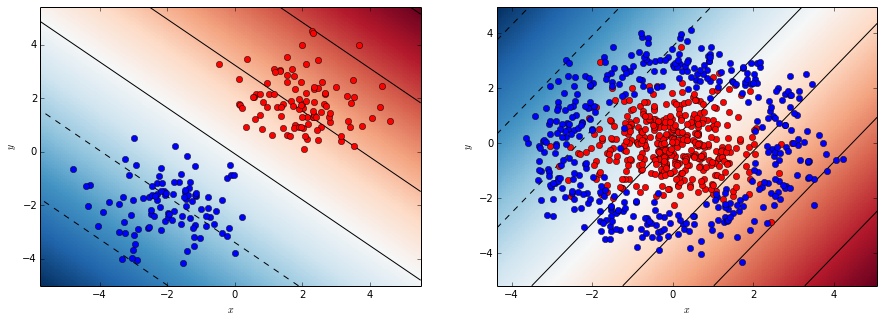

In [93]:
gamma = 0.1

lda=LDA(gamma, shogun_feats_linear, shogun_labels_linear)
lda.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(lda,feats_linear,labels_linear)

lda=LDA(gamma, shogun_feats_non_linear, shogun_labels_non_linear)
lda.train()

plt.subplot(122)
plot_model(lda,feats_non_linear,labels_non_linear)

## <a id ="section6">Quadratic Discriminant Analysis</a>

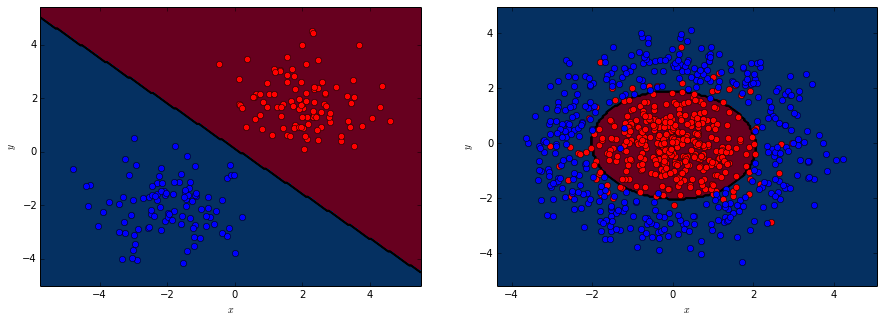

In [97]:
qda = QDA(shogun_feats_linear, shogun_multiclass_labels_linear)
qda.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(qda,feats_linear,labels_linear,fading=False)

qda = QDA(shogun_feats_non_linear, shogun_multiclass_labels_non_linear)
qda.train()

plt.subplot(122)
plot_model(qda,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section7">Gaussian Process</a>

<a id ="section7a">Logit Likelihood model</a>

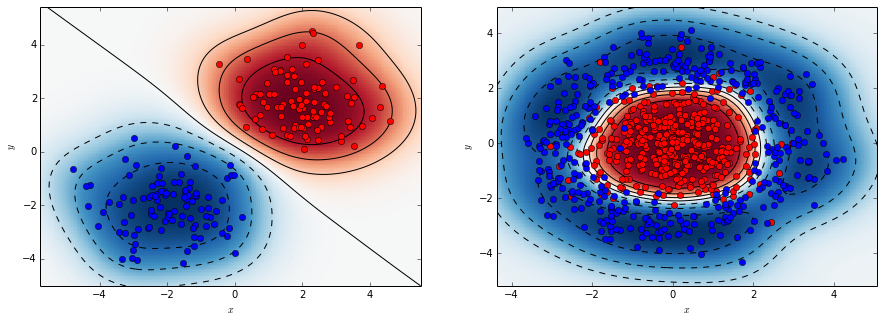

In [100]:
# create Gaussian kernel with width = 2.0
kernel = GaussianKernel(10, 2)
# create zero mean function
zero_mean = ZeroMean()
# create logit likelihood model
likelihood = LogitLikelihood()
# specify EP approximation inference method
inference_model_linear = EPInferenceMethod(kernel, shogun_feats_linear, zero_mean, shogun_labels_linear, likelihood)
# create and train GP classifier, which uses Laplace approximation
gaussian_process = GaussianProcessClassification(inference_model_linear)
gaussian_process.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(gaussian_process,feats_linear,labels_linear)

inference_model_non_linear = EPInferenceMethod(kernel, shogun_feats_non_linear, zero_mean, shogun_labels_non_linear, likelihood)
gaussian_process = GaussianProcessClassification(inference_model_non_linear)
gaussian_process.train()

plt.subplot(122)
plot_model(gaussian_process,feats_non_linear,labels_non_linear)

<a id ="section7b">Probit Likelihood model</a> 

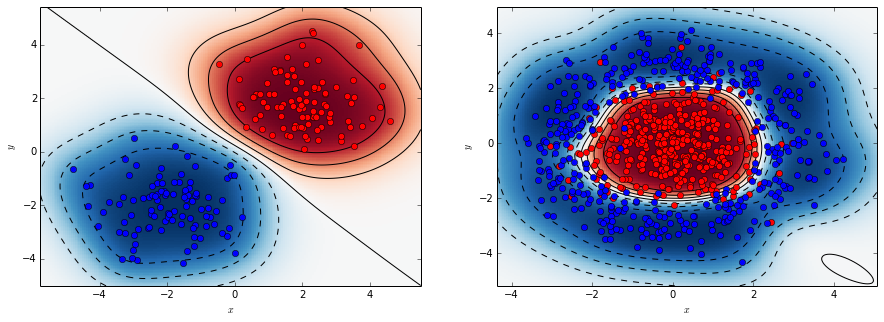

In [101]:
likelihood = ProbitLikelihood()

inference_model_linear = EPInferenceMethod(kernel, shogun_feats_linear, zero_mean, shogun_labels_linear, likelihood)
gaussian_process = GaussianProcessClassification(inference_model_linear)
gaussian_process.train()

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_model(gaussian_process,feats_linear,labels_linear)

inference_model_non_linear = EPInferenceMethod(kernel, shogun_feats_non_linear, zero_mean, shogun_labels_non_linear, likelihood)
gaussian_process = GaussianProcessClassification(inference_model_non_linear)
gaussian_process.train()

plt.subplot(122)
plot_model(gaussian_process,feats_non_linear,labels_non_linear)